In [5]:
!pip install pandas
import pandas as pd

In [81]:
pulls_one = pd.read_csv('./datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('./datasets/pulls_2014-2018.csv')
pulls_fills = pd.read_csv('./datasets/pull_files.csv')


In [82]:
pull = pd.concat([pulls_one,pulls_two])
pull['date'] = pd.to_datetime(pull['date'],utc=True)

In [83]:

data = pull.merge(pulls_fills , on='pid')
data.head(2)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala


In [84]:
data['month']= pd.DatetimeIndex(data['date']).month
data['year']= pd.DatetimeIndex(data['date']).year
counts = data.groupby(['month','year']).count()
print(counts)


             pid  user  date  file
month year                        
1     2012   489   489   489   489
      2013  3717  3717  3717  3717
      2014  1140  1140  1140  1140
      2015   732   732   732   732
      2016   640   640   640   640
...          ...   ...   ...   ...
12    2013  1692  1692  1692  1692
      2014  1001  1001  1001  1001
      2015   616   616   616   616
      2016   468   468   468   468
      2017   224   224   224   224

[74 rows x 4 columns]


In [85]:
counts.plot(kind='bar', figsize=(12,4))

<Axes: xlabel='month,year'>

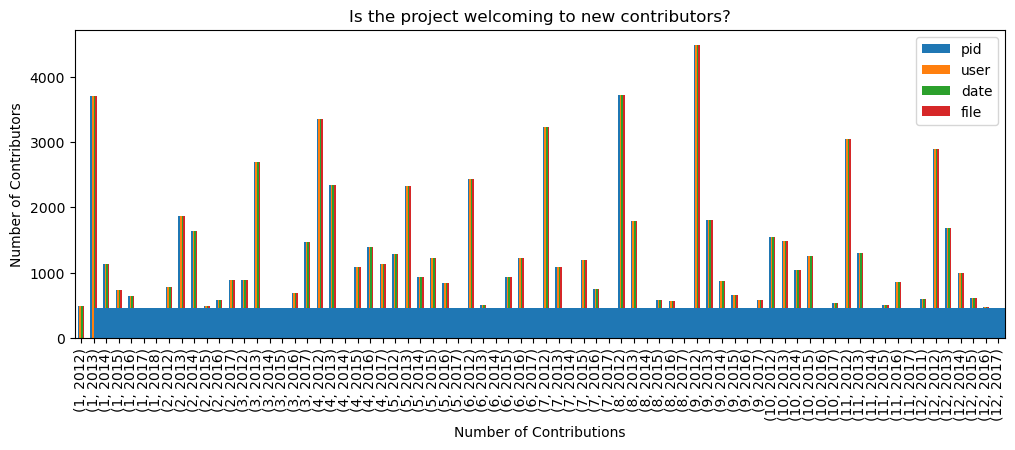

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
by_user = data.groupby('user')['pid'].count()
plt.hist(by_user, bins=8)
plt.xlabel('Number of Contributions')
plt.ylabel('Number of Contributors')
plt.title('Is the project welcoming to new contributors?')
plt.show()


In [87]:
pull_10 = pull[-10:]
joined_pr = pull_10.merge(pulls_fills, on='pid')
unique_file = set(joined_pr['file'].unique())
unique_file

{'build.xml',
 'src/asm/scala/tools/asm/MethodWriter.java',
 'src/compiler/scala/tools/nsc/ast/parser/Parsers.scala',
 'src/compiler/scala/tools/nsc/ast/parser/Scanners.scala',
 'src/compiler/scala/tools/nsc/backend/icode/GenICode.scala',
 'src/compiler/scala/tools/nsc/backend/icode/Members.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/GenASM.scala',
 'src/compiler/scala/tools/nsc/symtab/BrowsingLoaders.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ICodeReader.scala',
 'src/compiler/scala/tools/nsc/typechecker/Typers.scala',
 'src/library/scala/collection/immutable/HashMap.scala',
 'src/library/scala/collection/immutable/HashSet.scala',
 'src/library/scala/math/Numeric.scala',
 'src/reflect/scala/reflect/api/StandardLiftables.scala',
 'src/reflect/scala/reflect/api/Trees.scala',
 'src/reflect/scala/reflect/internal/Importers.scala',
 'src/reflect/scala/reflect/internal/Trees.scala',
 'src/reflect/scala/reflect/internal/pickling/UnPickler.scala',
 'test/files/neg/t6426.ch

In [74]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file'] == file] 
author_counts = file_pr.groupby('user').count()
print(list(author_counts.nlargest(3, 'pid').index))

['xeno-by', 'retronym', 'soc']


In [91]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = pulls_fills[pulls_fills['file'] == file]
joined_pr = file_pr.merge(pull, on='pid')
users_last_10 = set(joined_pr.nlargest(10, 'pid', keep = 'last')['user'])
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

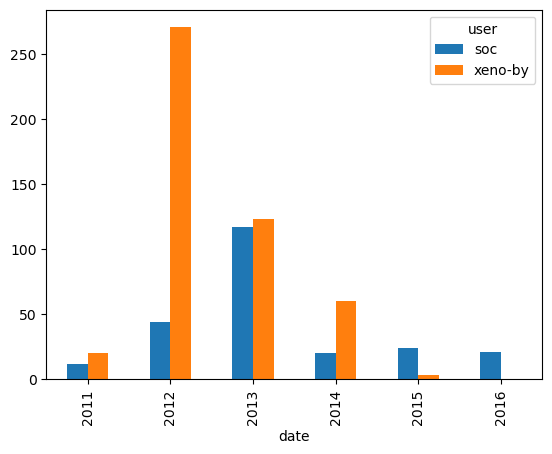

In [93]:
authors = ['xeno-by', 'soc']
by_author = pull[pull['user'].isin(authors)]
counts = by_author.groupby(['user', by_author.date.dt.year]).agg({'pid': 'count'}).reset_index()
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide.plot.bar()
plt.show()

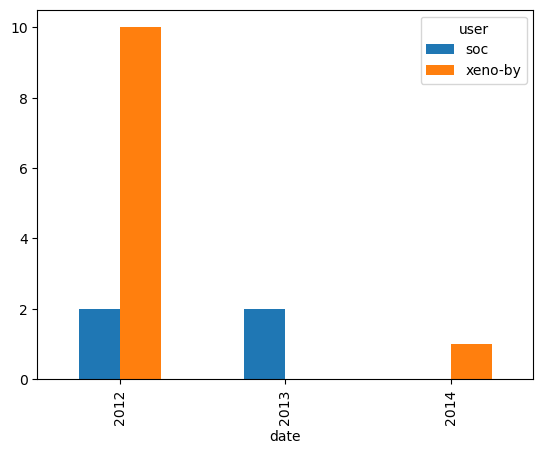

In [94]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
by_author = data[(data['user'] == authors[0]) | (data['user'] == authors[1])]
by_file = by_author[by_author['file'] == file]
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)
by_file_wide.plot(kind='bar')
plt.show()
